In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
import xgboost as xgb

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
train_df=pd.read_csv('train_health_insurance.csv')


In [16]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [17]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [18]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Premium'>

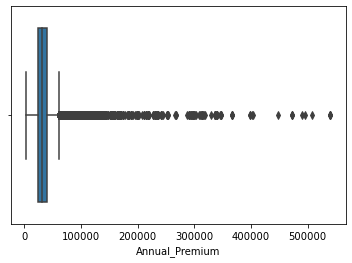

In [19]:
sns.boxplot(train_df['Annual_Premium'])

In [20]:
q1=train_df['Annual_Premium'].quantile(0.25)

In [21]:
q3=train_df['Annual_Premium'].quantile(0.75)

In [22]:
IQR=q3-q1

In [23]:
lower=q1-1.5*IQR

In [24]:
upper=q3+1.5*IQR

In [25]:
train_df=train_df[(train_df['Annual_Premium']>lower) & (train_df['Annual_Premium']<upper)]

In [26]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


<AxesSubplot:xlabel='Gender', ylabel='count'>

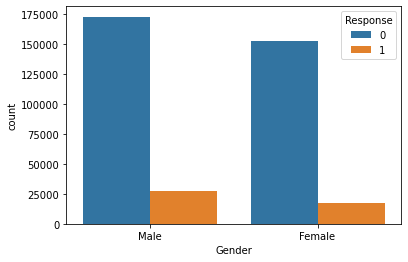

In [27]:
sns.countplot(x=train_df['Gender'],hue=train_df['Response'])

In [28]:
train_df.groupby(['Gender','Response']).size()

Gender  Response
Female  0           152871
        1            17599
Male    0           172763
        1            27556
dtype: int64

# Observations:
1. Male customers are more interested compare to female customers to buy vehicle insurance.

In [29]:
label_df=train_df.groupby('Gender')['Response'].value_counts().sort_values(ascending=False).index


In [30]:
val_df=train_df.groupby('Gender')['Response'].value_counts().sort_values(ascending=False).values


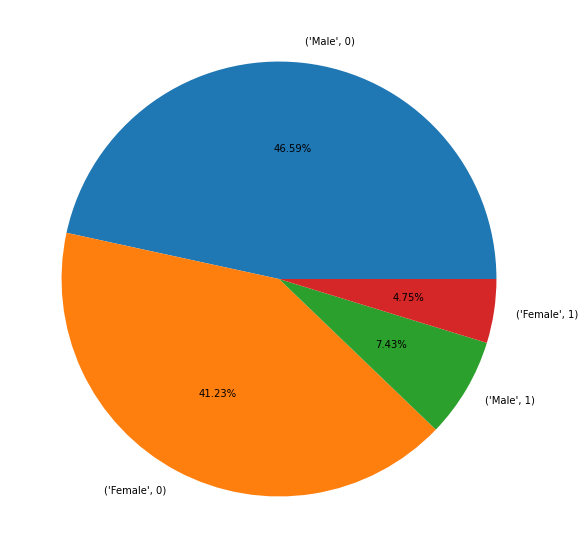

In [31]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

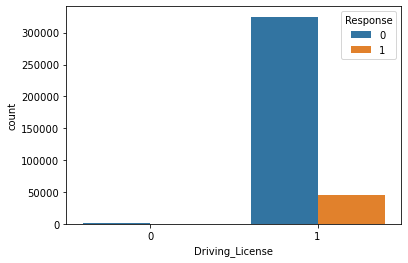

In [32]:
sns.countplot(x=train_df['Driving_License'],hue=train_df['Response'])

In [33]:
label_df=train_df.groupby('Driving_License')['Response'].value_counts().sort_values(ascending=False).index


In [34]:
val_df=train_df.groupby('Driving_License')['Response'].value_counts().sort_values(ascending=False).values


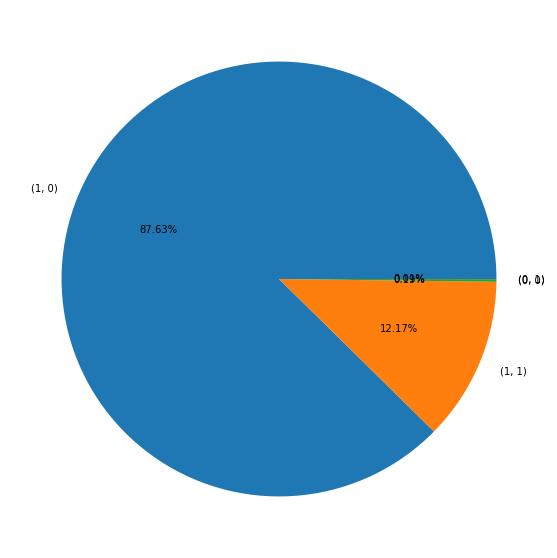

In [35]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [36]:
train_df.groupby('Driving_License')['Response'].value_counts()

Driving_License  Response
0                0              723
                 1               40
1                0           324911
                 1            45115
Name: Response, dtype: int64

# Observations:
1. Customers having driving license are more interested to buy vehicle insurance as compare to customers not having driving license 

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

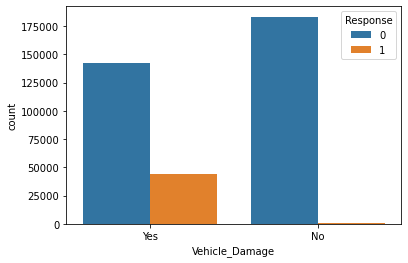

In [37]:
sns.countplot(x=train_df['Vehicle_Damage'],hue=train_df['Response'])

In [38]:
label_df=train_df.groupby('Vehicle_Damage')['Response'].value_counts().sort_values(ascending=False).index


In [39]:
val_df=train_df.groupby('Vehicle_Damage')['Response'].value_counts().sort_values(ascending=False).values


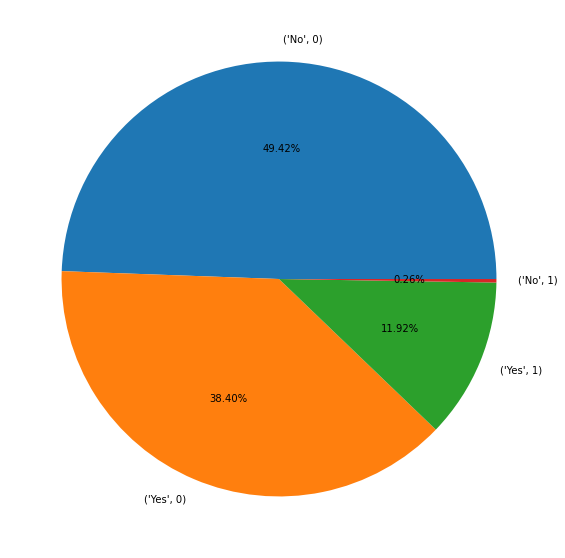

In [40]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [41]:
train_df.groupby('Vehicle_Damage')['Response'].value_counts()

Vehicle_Damage  Response
No              0           183261
                1              967
Yes             0           142373
                1            44188
Name: Response, dtype: int64

# Observations:
1. Customers whoes vehicle got damaged are more interesed  to buy vehicle insurance as compared to customers whoes vehicle did not got damaged.

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

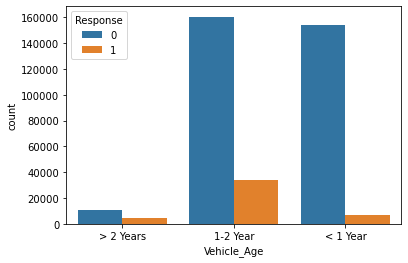

In [42]:
sns.countplot(x=train_df['Vehicle_Age'],hue=train_df['Response'])

In [43]:
train_df.groupby('Vehicle_Age')['Response'].value_counts()

Vehicle_Age  Response
1-2 Year     0           160467
             1            33745
< 1 Year     0           154487
             1             7060
> 2 Years    0            10680
             1             4350
Name: Response, dtype: int64

# Observations:
1. Customers whoes vehicle Age is between 1 to 2 years are more interesed to buy vehicle insurance.

In [44]:
label_df=train_df.groupby('Vehicle_Age')['Response'].value_counts().sort_values(ascending=False).index


In [45]:
val_df=train_df.groupby('Vehicle_Age')['Response'].value_counts().sort_values(ascending=False).values


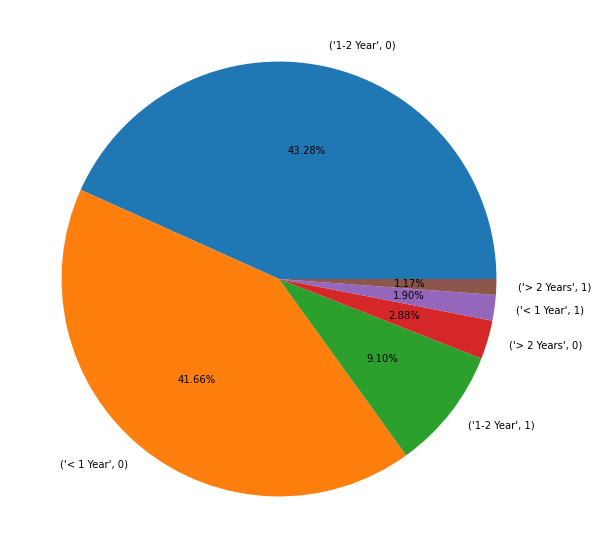

In [46]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

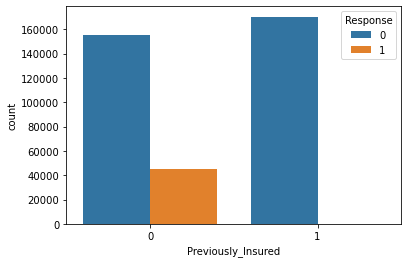

In [47]:
sns.countplot(x=train_df['Previously_Insured'],hue=train_df['Response'])

In [48]:
train_df.groupby('Previously_Insured')['Response'].value_counts()

Previously_Insured  Response
0                   0           155349
                    1            45001
1                   0           170285
                    1              154
Name: Response, dtype: int64

# Observations:
1. Customers whoes vehicle is not previously insured are more interesed to buy vehicle insurance.

In [49]:
label_df=train_df.groupby('Previously_Insured')['Response'].value_counts().sort_values(ascending=False).index


In [50]:
val_df=train_df.groupby('Previously_Insured')['Response'].value_counts().sort_values(ascending=False).values


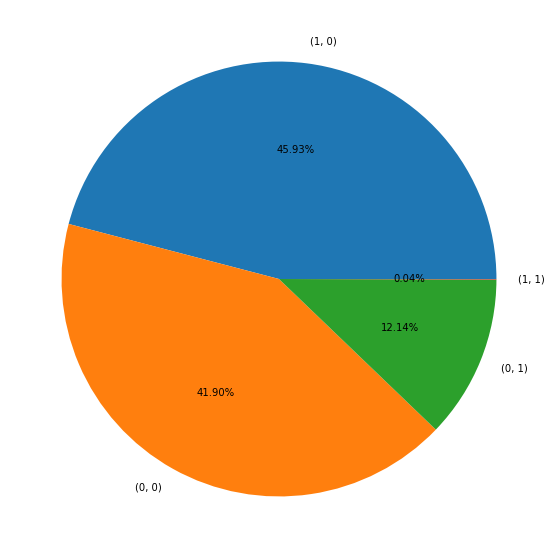

In [51]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

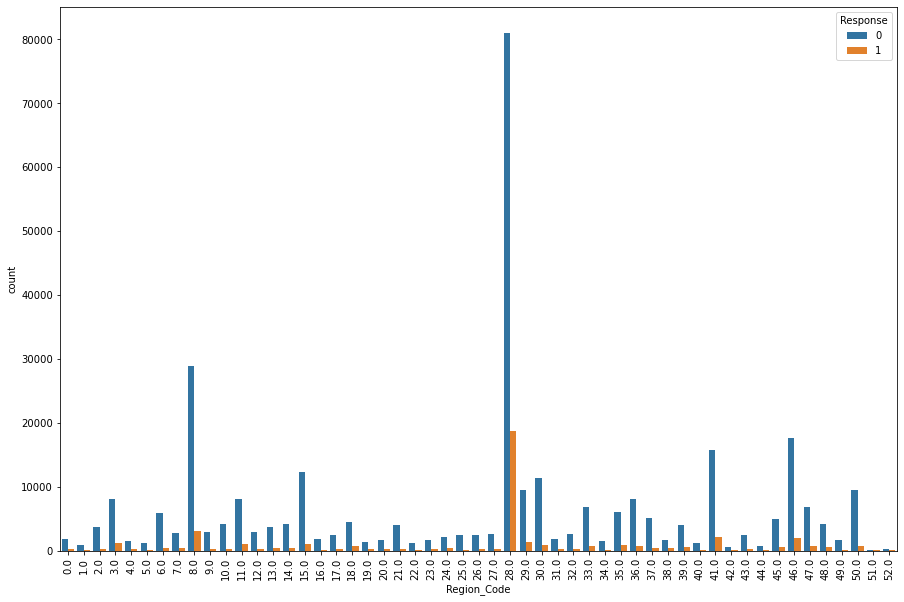

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(x=train_df['Region_Code'],hue=train_df['Response'])
plt.xticks(rotation=90)
plt.show()

In [53]:
train_df.groupby('Region_Code')['Response'].value_counts().sort_values(ascending=False)

Region_Code  Response
28.0         0           81037
8.0          0           28954
28.0         1           18704
46.0         0           17610
41.0         0           15759
                         ...  
22.0         1              80
42.0         1              44
44.0         1              33
52.0         1              33
51.0         1              26
Name: Response, Length: 106, dtype: int64

# Observations:
1. Customers whoes region code is 28 are more interesed to buy vehicle insurance.

In [54]:
label_df=train_df.groupby('Region_Code')['Response'].value_counts().sort_values(ascending=False).index


In [55]:
val_df=train_df.groupby('Region_Code')['Response'].value_counts().sort_values(ascending=False).values


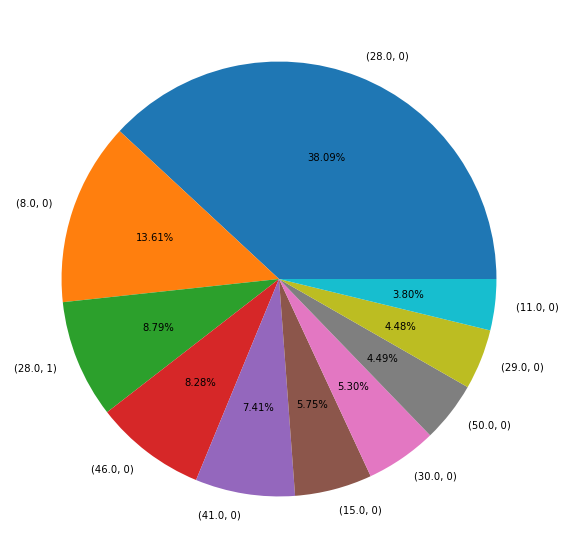

In [56]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

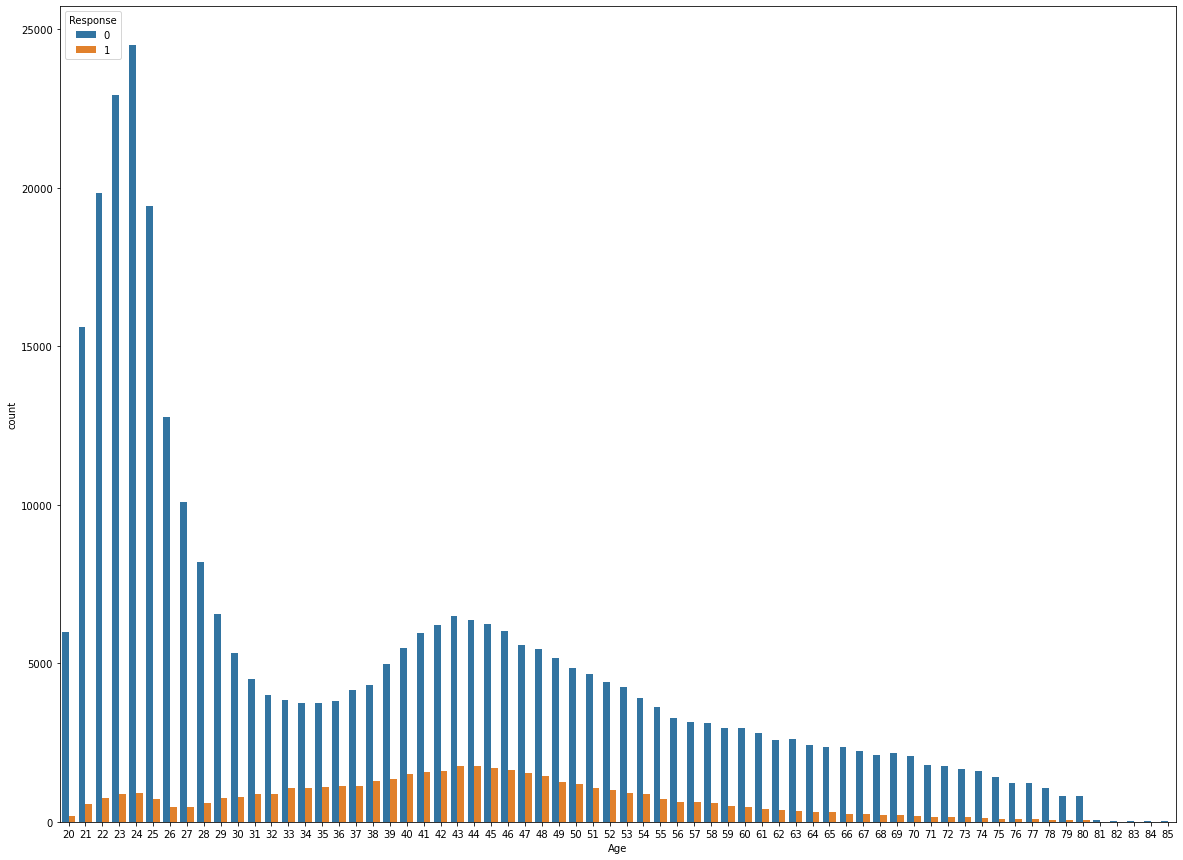

In [57]:
plt.figure(figsize=(20,15))
sns.countplot(x=train_df['Age'],hue=train_df['Response'])

In [58]:
label_df=train_df.groupby('Age')['Response'].value_counts().sort_values(ascending=False).index


In [59]:
val_df=train_df.groupby('Age')['Response'].value_counts().sort_values(ascending=False).values


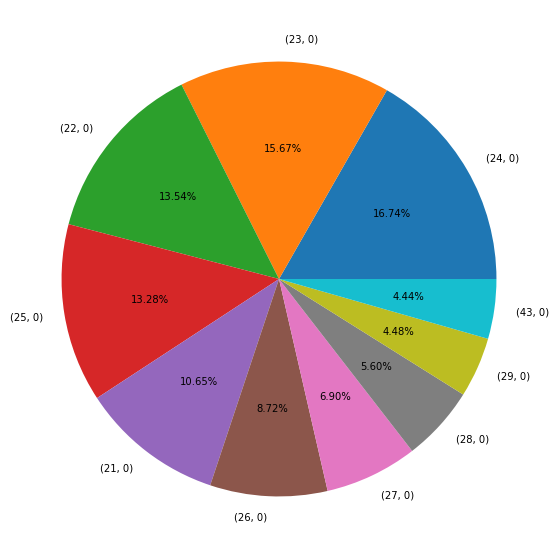

In [60]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df[:10],labels=label_df[:10],autopct="%1.2f%%")
plt.show()

In [61]:
train_df.groupby(['Age','Response']).size().sort_values(ascending=False)

Age  Response
24   0           24501
23   0           22935
22   0           19824
25   0           19442
21   0           15599
                 ...  
84   0              11
85   0              10
81   1               4
82   1               1
83   1               1
Length: 130, dtype: int64

# Observations:
1. Customers whoes age is 43 are more interesed to buy vehicle insurance.

<AxesSubplot:xlabel='Gender', ylabel='Annual_Premium'>

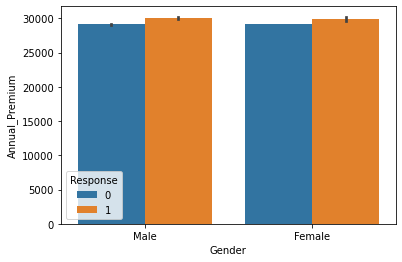

In [62]:
sns.barplot(x=train_df['Gender'],y=train_df['Annual_Premium'],hue=train_df['Response'])

In [63]:
train_df.groupby(['Gender','Response'])['Annual_Premium'].mean().sort_values(ascending=False)

Gender  Response
Male    1           30060.121389
Female  1           29905.051594
        0           29163.486462
Male    0           29162.037167
Name: Annual_Premium, dtype: float64

In [64]:
label_df=train_df.groupby(['Gender','Response'])['Annual_Premium'].mean().sort_values(ascending=False).index


In [65]:
val_df=train_df.groupby(['Gender','Response'])['Annual_Premium'].mean().sort_values(ascending=False).values


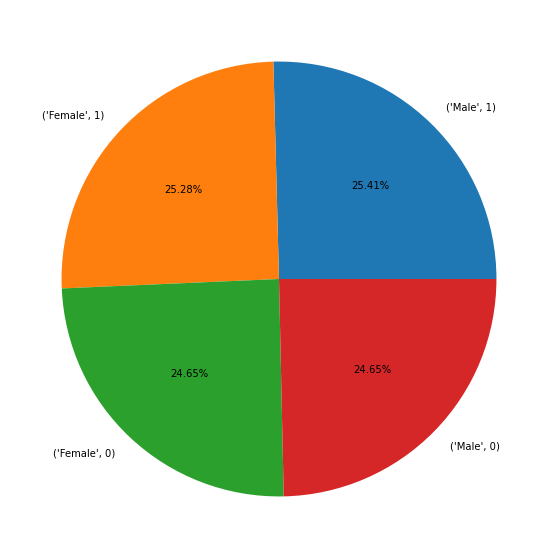

In [66]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Male Customers whoes average annual premium is 30060.121389 are more interesed to buy vehicle insurance.
2. Female Customers whoes average annual premium is 29905.051594 are more interesed to buy vehicle insurance.

<AxesSubplot:xlabel='Gender', ylabel='Vintage'>

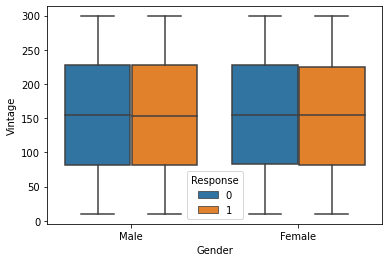

In [67]:
sns.boxplot(x=train_df['Gender'],y=train_df['Vintage'],hue=train_df['Response'])

<AxesSubplot:xlabel='Gender', ylabel='Annual_Premium'>

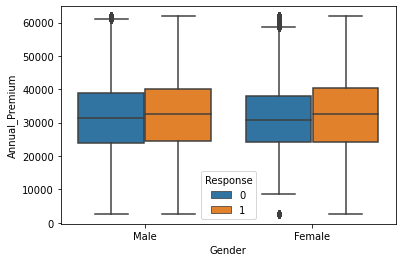

In [68]:
sns.boxplot(x=train_df['Gender'],y=train_df['Annual_Premium'],hue=train_df['Response'])

In [69]:
train_df.groupby(['Gender','Response'])['Annual_Premium'].median()

Gender  Response
Female  0           30843.0
        1           32479.0
Male    0           31467.0
        1           32560.0
Name: Annual_Premium, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Vintage'>

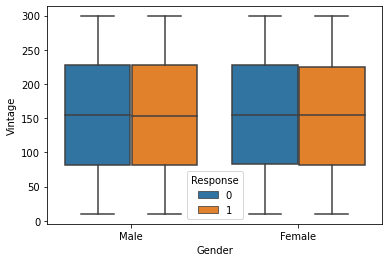

In [70]:
sns.boxplot(x=train_df['Gender'],y=train_df['Vintage'],hue=train_df['Response'])

In [71]:
train_df.groupby(['Gender','Response'])['Vintage'].median()

Gender  Response
Female  0           155.0
        1           154.0
Male    0           154.0
        1           153.0
Name: Vintage, dtype: float64

In [72]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [73]:
train_df['Age_Range']=pd.qcut(train_df['Age'],5)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_23736\3780181213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age_Range']=pd.qcut(train_df['Age'],5)


In [74]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Range
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,"(42.0, 52.0]"
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,"(52.0, 85.0]"
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,"(42.0, 52.0]"
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,"(19.999, 24.0]"
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,"(24.0, 29.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,"(52.0, 85.0]"
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,"(29.0, 42.0]"
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,"(19.999, 24.0]"
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,"(52.0, 85.0]"


<AxesSubplot:xlabel='Age_Range', ylabel='count'>

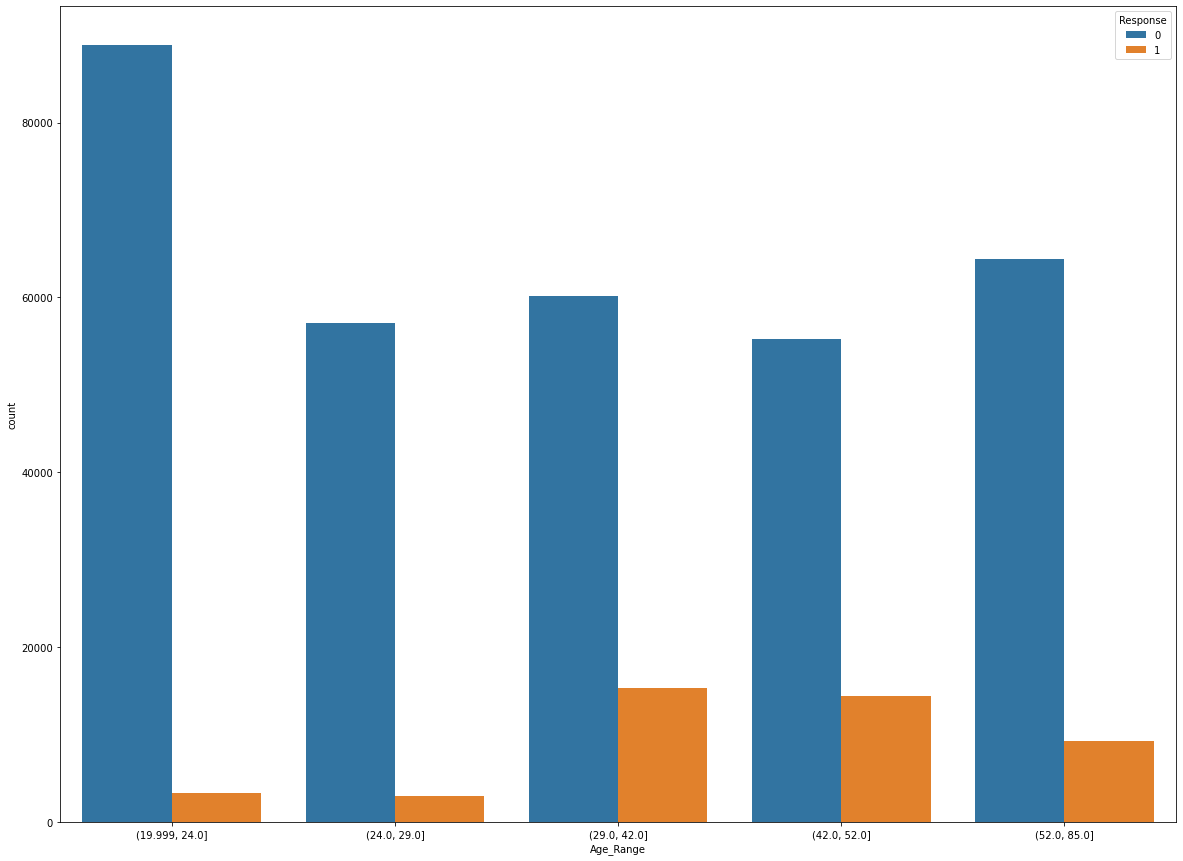

In [75]:
plt.figure(figsize=(20,15))
sns.countplot(x=train_df['Age_Range'],hue=train_df['Response'])

In [76]:
train_df.groupby(['Age_Range','Response']).size()

Age_Range       Response
(19.999, 24.0]  0           88838
                1            3255
(24.0, 29.0]    0           57049
                1            2994
(29.0, 42.0]    0           60114
                1           15320
(42.0, 52.0]    0           55221
                1           14367
(52.0, 85.0]    0           64412
                1            9219
dtype: int64

# Observations:
1. Customers whoes age is between 29 to 42 years are more interesed to buy vehicle insurance.

In [77]:
label_df=train_df.groupby(['Age_Range','Response']).size().sort_values(ascending=False).index


In [78]:
val_df=train_df.groupby(['Age_Range','Response']).size().sort_values(ascending=False).values


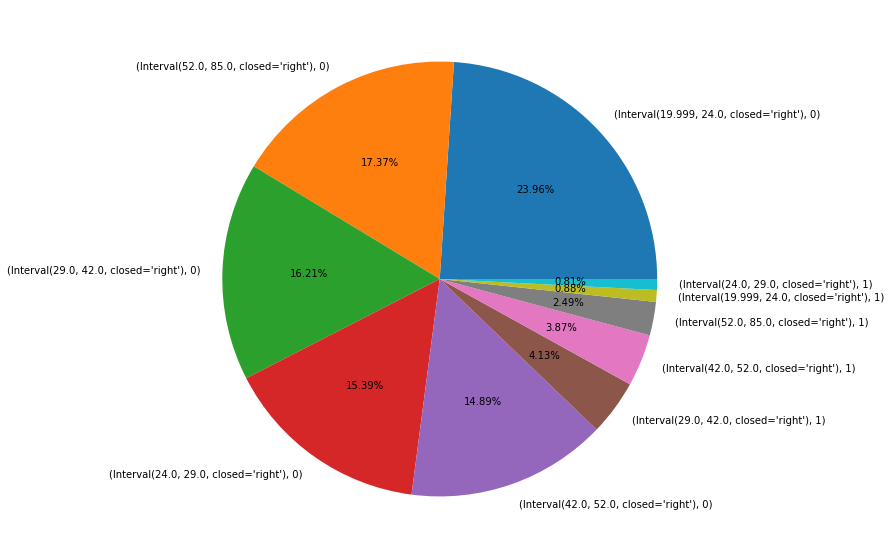

In [79]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

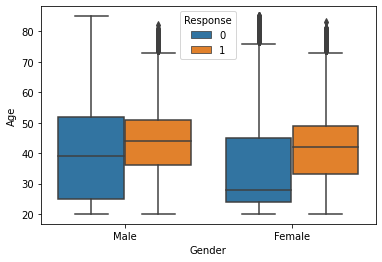

In [80]:
sns.boxplot(x=train_df['Gender'],y=train_df['Age'],hue=train_df['Response'])

In [81]:
train_df.groupby(['Gender','Response'])['Age'].median()

Gender  Response
Female  0           28.0
        1           42.0
Male    0           39.0
        1           44.0
Name: Age, dtype: float64

In [82]:
label_df=train_df.groupby(['Gender','Response'])['Age'].median().sort_values(ascending=False).index


In [83]:
val_df=train_df.groupby(['Gender','Response'])['Age'].median().sort_values(ascending=False).values


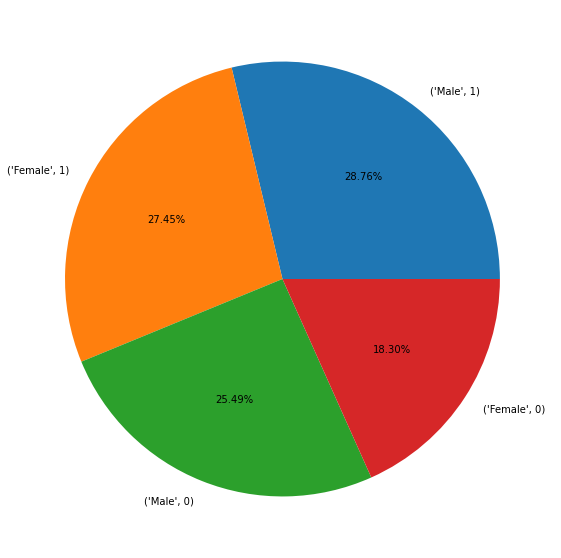

In [84]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [85]:
train_df['Vintage_Range']=pd.qcut(train_df['Vintage'],5)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_23736\4084950657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Vintage_Range']=pd.qcut(train_df['Vintage'],5)


In [86]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Range,Vintage_Range
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,"(42.0, 52.0]","(183.0, 241.0]"
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,"(52.0, 85.0]","(125.0, 183.0]"
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,"(42.0, 52.0]","(9.999, 68.0]"
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,"(19.999, 24.0]","(183.0, 241.0]"
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,"(24.0, 29.0]","(9.999, 68.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,"(52.0, 85.0]","(68.0, 125.0]"
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,"(29.0, 42.0]","(125.0, 183.0]"
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,"(19.999, 24.0]","(125.0, 183.0]"
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,"(52.0, 85.0]","(68.0, 125.0]"


<AxesSubplot:xlabel='Vintage_Range', ylabel='Annual_Premium'>

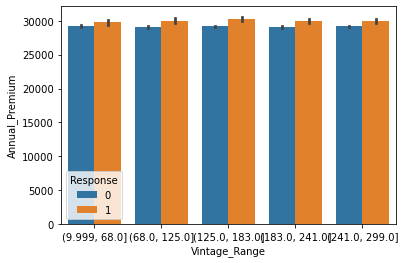

In [87]:
sns.barplot(x=train_df['Vintage_Range'],y=train_df['Annual_Premium'],hue=train_df['Response'])

<AxesSubplot:xlabel='Vintage_Range', ylabel='Age'>

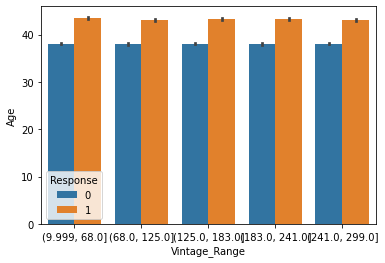

In [88]:
sns.barplot(x=train_df['Vintage_Range'],y=train_df['Age'],hue=train_df['Response'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vintage_Range', ylabel='count'>

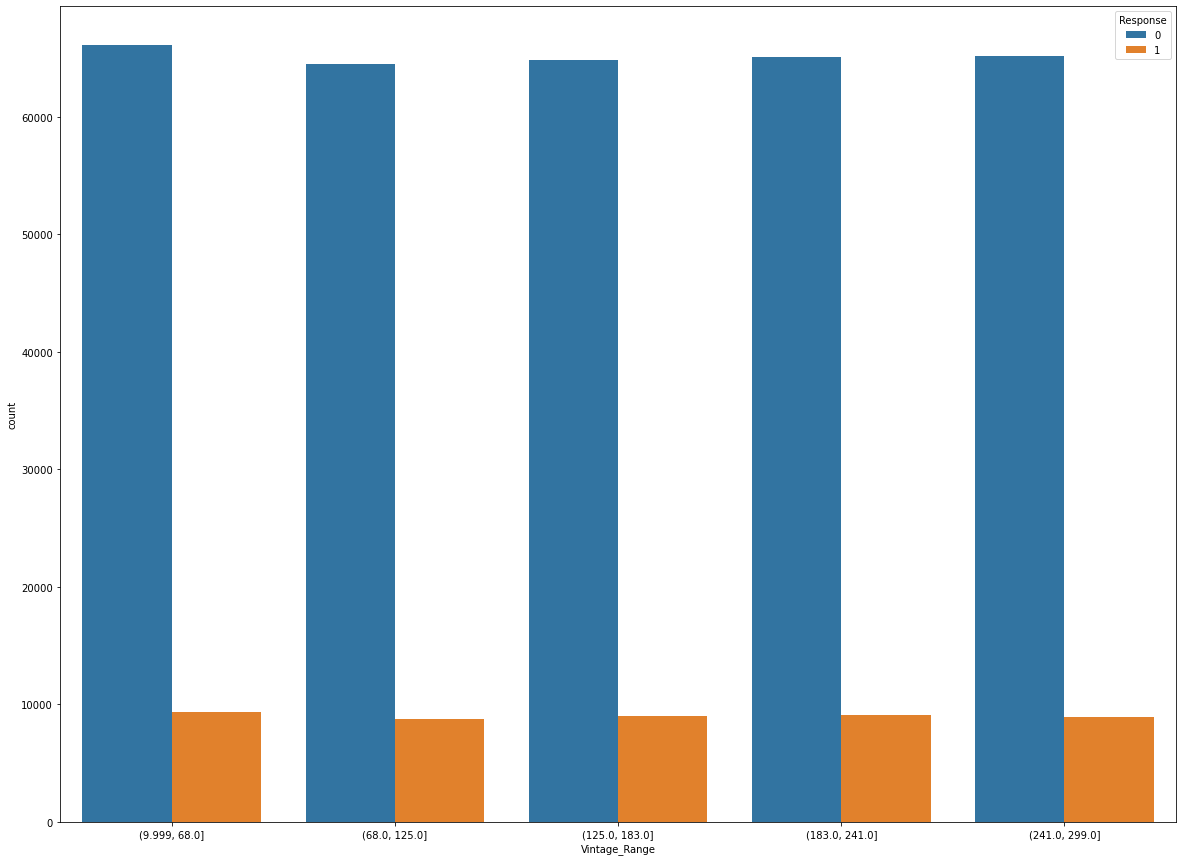

In [89]:
plt.figure(figsize=(20,15))
sns.countplot(train_df['Vintage_Range'],hue=train_df['Response'])

In [90]:
train_df.groupby(['Vintage_Range','Response']).size()

Vintage_Range   Response
(9.999, 68.0]   0           66088
                1            9330
(68.0, 125.0]   0           64466
                1            8794
(125.0, 183.0]  0           64860
                1            9008
(183.0, 241.0]  0           65072
                1            9109
(241.0, 299.0]  0           65148
                1            8914
dtype: int64

In [91]:
label_df=train_df.groupby(['Vintage_Range','Response']).size().sort_values(ascending=False).index


In [92]:
val_df=train_df.groupby(['Vintage_Range','Response']).size().sort_values(ascending=False).values


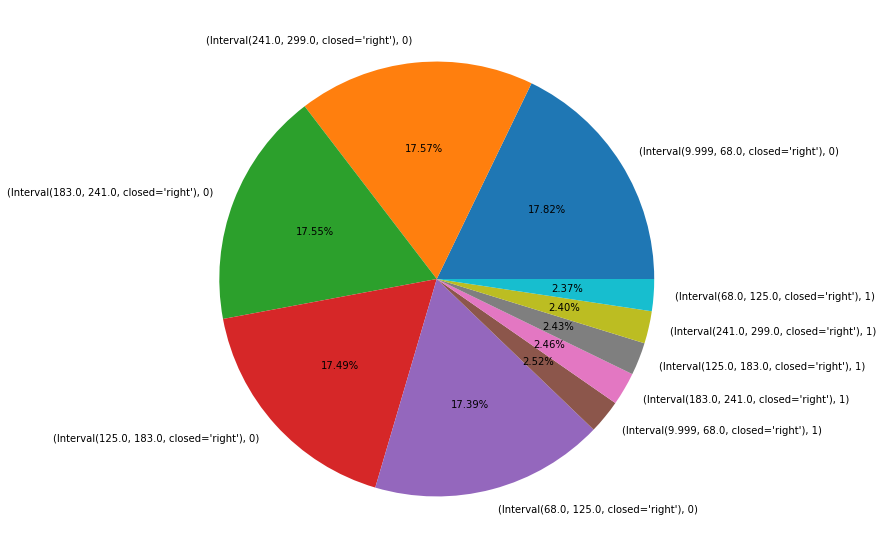

In [93]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers whoes Vintage Range is (9.999, 68.0] are more interesed to buy vehicle insurance.

In [94]:
train_df['Region_Code_Range']=pd.qcut(train_df['Region_Code'],4)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_23736\1250975786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Region_Code_Range']=pd.qcut(train_df['Region_Code'],4)


In [95]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Range,Vintage_Range,Region_Code_Range
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,"(42.0, 52.0]","(183.0, 241.0]","(15.0, 28.0]"
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,"(52.0, 85.0]","(125.0, 183.0]","(-0.001, 15.0]"
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,"(42.0, 52.0]","(9.999, 68.0]","(15.0, 28.0]"
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,"(19.999, 24.0]","(183.0, 241.0]","(-0.001, 15.0]"
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,"(24.0, 29.0]","(9.999, 68.0]","(36.0, 52.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,"(52.0, 85.0]","(68.0, 125.0]","(15.0, 28.0]"
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,"(29.0, 42.0]","(125.0, 183.0]","(36.0, 52.0]"
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,"(19.999, 24.0]","(125.0, 183.0]","(28.0, 36.0]"
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,"(52.0, 85.0]","(68.0, 125.0]","(-0.001, 15.0]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region_Code_Range', ylabel='count'>

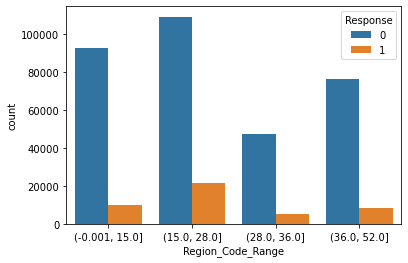

In [96]:
sns.countplot(train_df['Region_Code_Range'],hue=train_df['Response'])

In [97]:
label_df=train_df.groupby(['Region_Code_Range','Response']).size().sort_values(ascending=False).index


In [98]:
val_df=train_df.groupby(['Region_Code_Range','Response']).size().sort_values(ascending=False).values


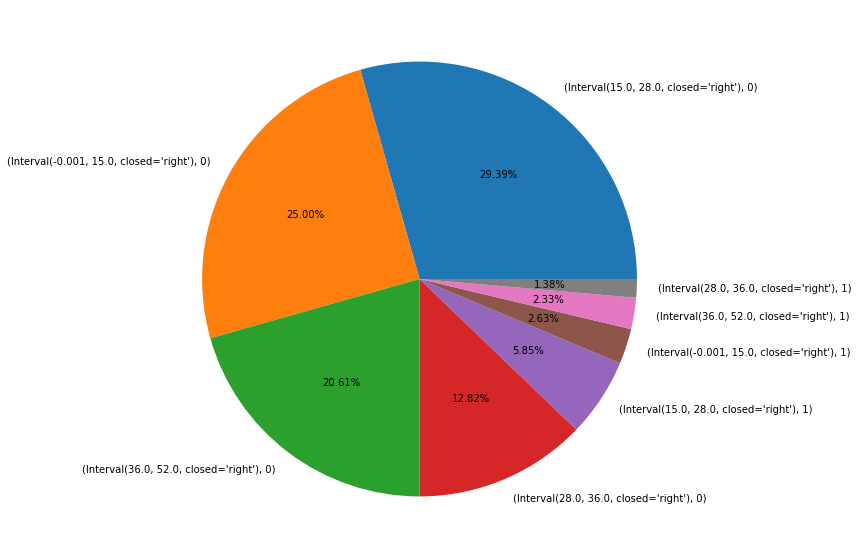

In [99]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers whoes Region_Code_Range is (15,28] are more interesed to buy vehicle insurance.

<AxesSubplot:xlabel='Region_Code_Range', ylabel='Annual_Premium'>

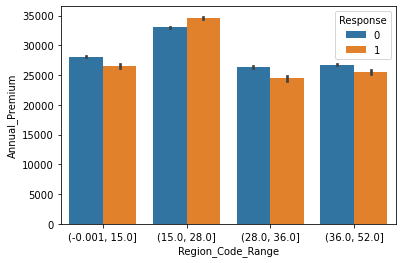

In [100]:
sns.barplot(x=train_df['Region_Code_Range'],y=train_df['Annual_Premium'],hue=train_df['Response'])

In [101]:
label_df=train_df.groupby(['Region_Code_Range','Response'])['Annual_Premium'].mean().sort_values(ascending=False).index


In [102]:
val_df=train_df.groupby(['Region_Code_Range','Response'])['Annual_Premium'].mean().sort_values(ascending=False).values


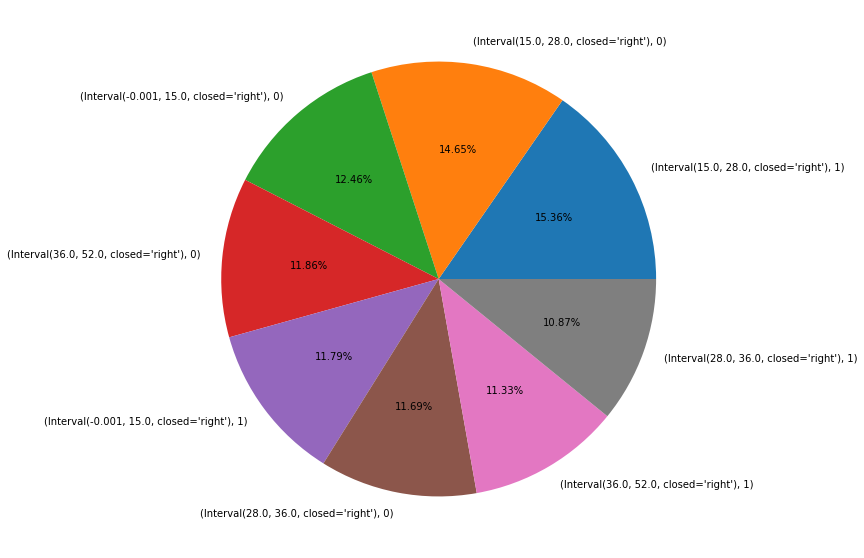

In [103]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers whoes Region_Code_Range is (15,28] and whose average annual premium is maxium are more interesed to buy vehicle insurance.

<AxesSubplot:xlabel='Region_Code_Range', ylabel='Age'>

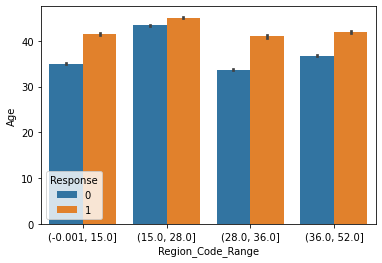

In [104]:
sns.barplot(x=train_df['Region_Code_Range'],y=train_df['Age'],hue=train_df['Response'])

In [105]:
label_df=train_df.groupby(['Region_Code_Range','Response'])['Age'].mean().sort_values(ascending=False).index


In [106]:
val_df=train_df.groupby(['Region_Code_Range','Response'])['Age'].mean().sort_values(ascending=False).values


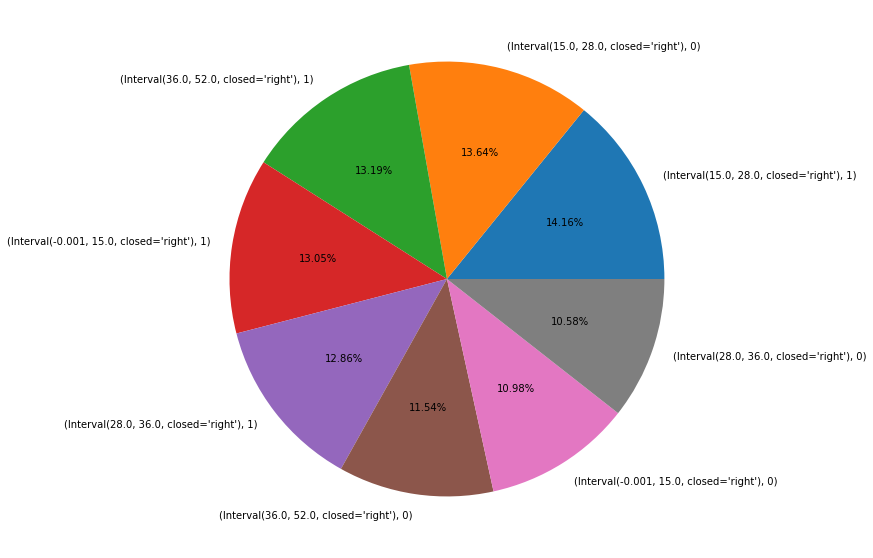

In [107]:
plt.figure(figsize=(10,10))

plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers whoes Region_Code_Range is (15,28] and whose average age is maxium are more interesed to buy vehicle insurance.

In [108]:
train_df['Policy_Sales_Channel_Range']=pd.qcut(train_df['Policy_Sales_Channel'],4)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_23736\4056489673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Policy_Sales_Channel_Range']=pd.qcut(train_df['Policy_Sales_Channel'],4)


In [109]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Range,Vintage_Range,Region_Code_Range,Policy_Sales_Channel_Range
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,"(42.0, 52.0]","(183.0, 241.0]","(15.0, 28.0]","(0.999, 30.0]"
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,"(52.0, 85.0]","(125.0, 183.0]","(-0.001, 15.0]","(0.999, 30.0]"
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,"(42.0, 52.0]","(9.999, 68.0]","(15.0, 28.0]","(0.999, 30.0]"
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,"(19.999, 24.0]","(183.0, 241.0]","(-0.001, 15.0]","(151.0, 152.0]"
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,"(24.0, 29.0]","(9.999, 68.0]","(36.0, 52.0]","(151.0, 152.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,"(52.0, 85.0]","(68.0, 125.0]","(15.0, 28.0]","(0.999, 30.0]"
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,"(29.0, 42.0]","(125.0, 183.0]","(36.0, 52.0]","(151.0, 152.0]"
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,"(19.999, 24.0]","(125.0, 183.0]","(28.0, 36.0]","(152.0, 163.0]"
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,"(52.0, 85.0]","(68.0, 125.0]","(-0.001, 15.0]","(30.0, 151.0]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Policy_Sales_Channel_Range', ylabel='count'>

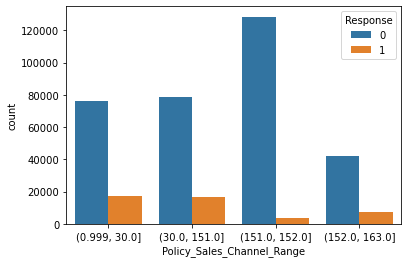

In [110]:
sns.countplot(train_df['Policy_Sales_Channel_Range'],hue=train_df['Response'])

In [111]:
label_df=train_df.groupby(['Policy_Sales_Channel_Range','Response']).size().sort_values(ascending=False).index


In [112]:
val_df=train_df.groupby(['Policy_Sales_Channel_Range','Response']).size().sort_values(ascending=False).values


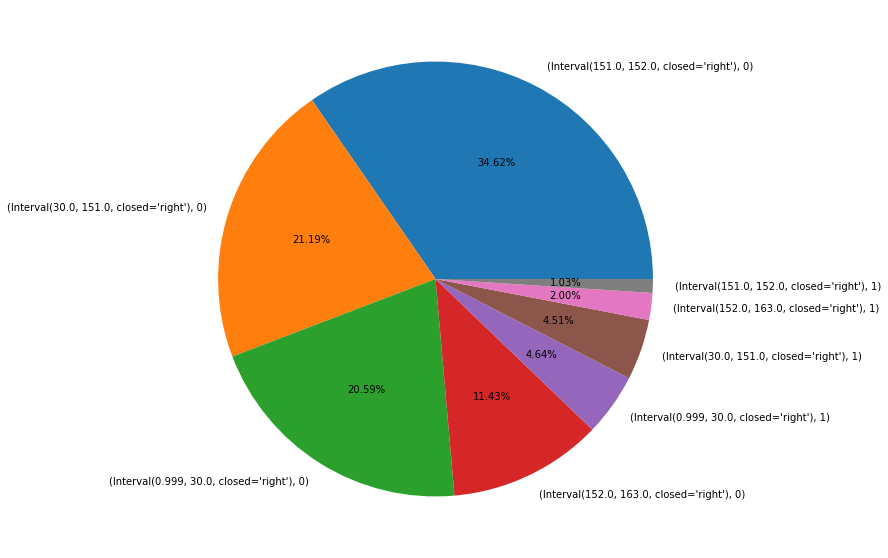

In [113]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers whoes Policy_Sales_Channel_Range is (0.999,30]  are more interesed to buy vehicle insurance.

<AxesSubplot:xlabel='Policy_Sales_Channel_Range', ylabel='Annual_Premium'>

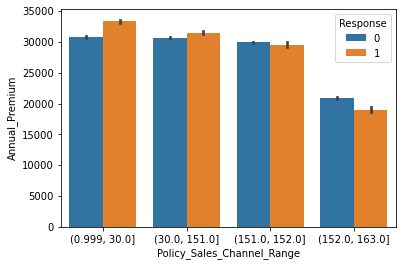

In [114]:
sns.barplot(x=train_df['Policy_Sales_Channel_Range'],y=train_df['Annual_Premium'],hue=train_df['Response'])

In [115]:
label_df=train_df.groupby(['Policy_Sales_Channel_Range','Response'])['Annual_Premium'].mean().sort_values(ascending=False).index


In [116]:
val_df=train_df.groupby(['Policy_Sales_Channel_Range','Response'])['Annual_Premium'].mean().sort_values(ascending=False).values


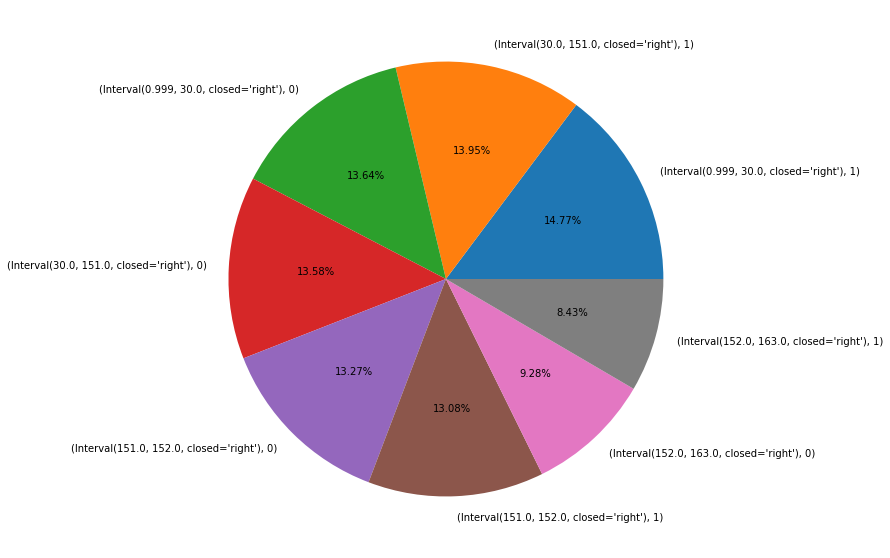

In [117]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers whoes Policy_Sales_Channel_Range is (0.999,30] having maximum average Annual_Premium are more interesed to buy vehicle insurance.

<AxesSubplot:xlabel='Policy_Sales_Channel_Range', ylabel='Age'>

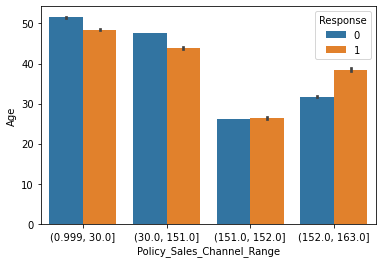

In [118]:
sns.barplot(x=train_df['Policy_Sales_Channel_Range'],y=train_df['Age'],hue=train_df['Response'])

In [119]:
label_df=train_df.groupby(['Policy_Sales_Channel_Range','Response'])['Age'].mean().sort_values(ascending=False).index


In [120]:
val_df=train_df.groupby(['Policy_Sales_Channel_Range','Response'])['Age'].mean().sort_values(ascending=False).values


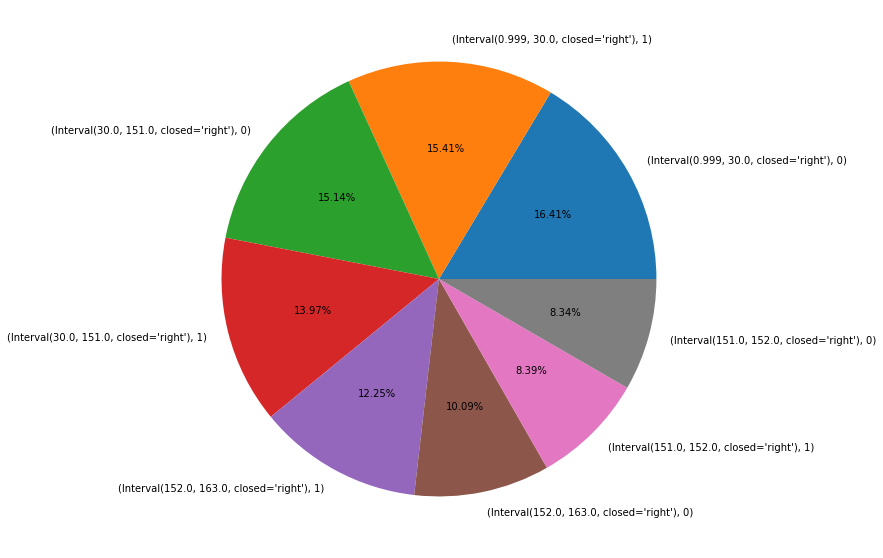

In [121]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

# Observations:
1. Customers whoes Policy_Sales_Channel_Range is (0.999,30] having maximum average age are more interesed to buy vehicle insurance.

In [122]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Range,Vintage_Range,Region_Code_Range,Policy_Sales_Channel_Range
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,"(42.0, 52.0]","(183.0, 241.0]","(15.0, 28.0]","(0.999, 30.0]"
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,"(52.0, 85.0]","(125.0, 183.0]","(-0.001, 15.0]","(0.999, 30.0]"
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,"(42.0, 52.0]","(9.999, 68.0]","(15.0, 28.0]","(0.999, 30.0]"
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,"(19.999, 24.0]","(183.0, 241.0]","(-0.001, 15.0]","(151.0, 152.0]"
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,"(24.0, 29.0]","(9.999, 68.0]","(36.0, 52.0]","(151.0, 152.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,"(52.0, 85.0]","(68.0, 125.0]","(15.0, 28.0]","(0.999, 30.0]"
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,"(29.0, 42.0]","(125.0, 183.0]","(36.0, 52.0]","(151.0, 152.0]"
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,"(19.999, 24.0]","(125.0, 183.0]","(28.0, 36.0]","(152.0, 163.0]"
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,"(52.0, 85.0]","(68.0, 125.0]","(-0.001, 15.0]","(30.0, 151.0]"


<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

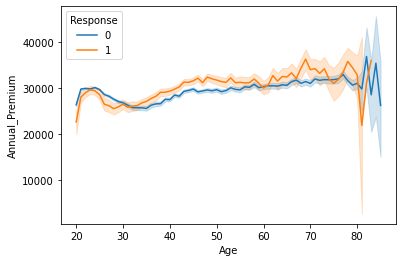

In [123]:
sns.lineplot(x=train_df['Age'],y=train_df['Annual_Premium'],hue=train_df['Response'])

# Observations:
1. As the Age increase Annual Premium also increases.

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

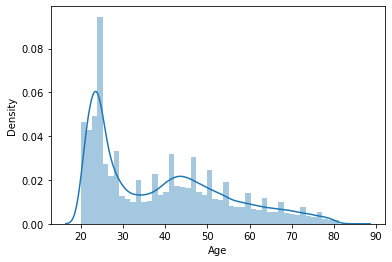

In [124]:
sns.distplot(train_df['Age'])

In [125]:
train_df['Age']=np.log(train_df['Age'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_23736\3080753194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age']=np.log(train_df['Age'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

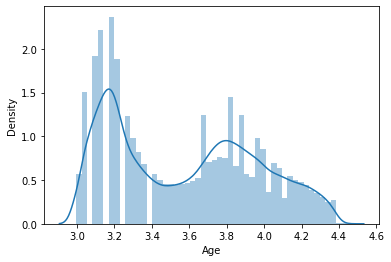

In [126]:
sns.distplot(train_df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

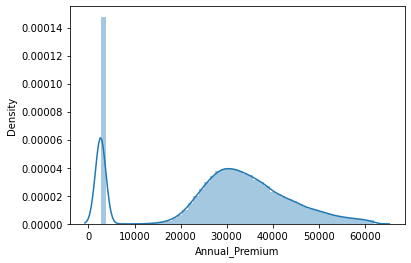

In [127]:
sns.distplot(train_df['Annual_Premium'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

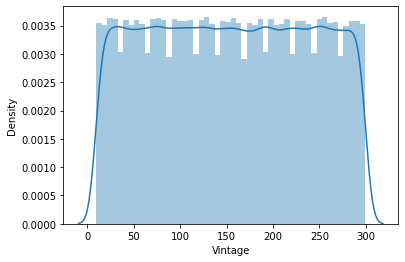

In [128]:
sns.distplot(train_df['Vintage'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Region_Code', ylabel='Density'>

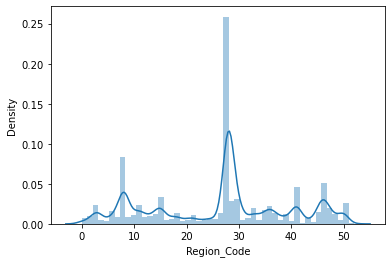

In [129]:
sns.distplot(train_df['Region_Code'])

In [130]:
le=LabelEncoder()


In [131]:
train_df['Gender']=le.fit_transform(train_df['Gender'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_23736\1828196720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Gender']=le.fit_transform(train_df['Gender'])


In [132]:
train_df['Vehicle_Age']=le.fit_transform(train_df['Vehicle_Age'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_23736\2603735160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Vehicle_Age']=le.fit_transform(train_df['Vehicle_Age'])


In [133]:
train_df['Vehicle_Damage']=le.fit_transform(train_df['Vehicle_Damage'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_23736\4247602182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Vehicle_Damage']=le.fit_transform(train_df['Vehicle_Damage'])


In [134]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Range,Vintage_Range,Region_Code_Range,Policy_Sales_Channel_Range
0,1,1,3.784190,1,28.0,0,2,1,40454.0,26.0,217,1,"(42.0, 52.0]","(183.0, 241.0]","(15.0, 28.0]","(0.999, 30.0]"
1,2,1,4.330733,1,3.0,0,0,0,33536.0,26.0,183,0,"(52.0, 85.0]","(125.0, 183.0]","(-0.001, 15.0]","(0.999, 30.0]"
2,3,1,3.850148,1,28.0,0,2,1,38294.0,26.0,27,1,"(42.0, 52.0]","(9.999, 68.0]","(15.0, 28.0]","(0.999, 30.0]"
3,4,1,3.044522,1,11.0,1,1,0,28619.0,152.0,203,0,"(19.999, 24.0]","(183.0, 241.0]","(-0.001, 15.0]","(151.0, 152.0]"
4,5,0,3.367296,1,41.0,1,1,0,27496.0,152.0,39,0,"(24.0, 29.0]","(9.999, 68.0]","(36.0, 52.0]","(151.0, 152.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,4.304065,1,26.0,1,0,0,30170.0,26.0,88,0,"(52.0, 85.0]","(68.0, 125.0]","(15.0, 28.0]","(0.999, 30.0]"
381105,381106,1,3.401197,1,37.0,1,1,0,40016.0,152.0,131,0,"(29.0, 42.0]","(125.0, 183.0]","(36.0, 52.0]","(151.0, 152.0]"
381106,381107,1,3.044522,1,30.0,1,1,0,35118.0,160.0,161,0,"(19.999, 24.0]","(125.0, 183.0]","(28.0, 36.0]","(152.0, 163.0]"
381107,381108,0,4.219508,1,14.0,0,2,1,44617.0,124.0,74,0,"(52.0, 85.0]","(68.0, 125.0]","(-0.001, 15.0]","(30.0, 151.0]"


In [135]:
train_df.drop(['Age_Range','Vintage_Range','Region_Code_Range','Policy_Sales_Channel_Range'],axis=1,inplace=True)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_23736\3505431969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['Age_Range','Vintage_Range','Region_Code_Range','Policy_Sales_Channel_Range'],axis=1,inplace=True)


<AxesSubplot:>

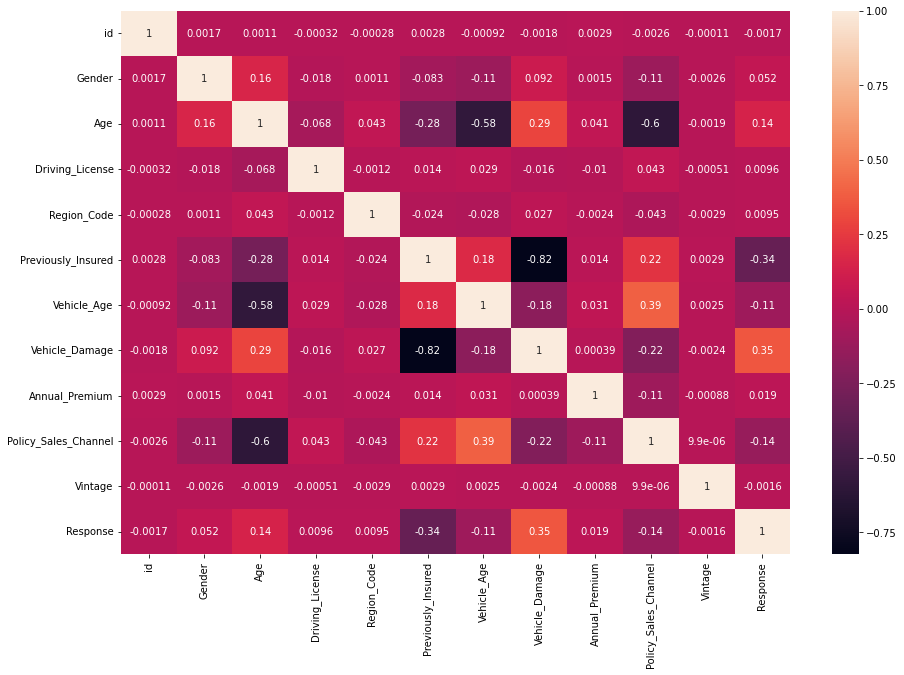

In [136]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(),annot=True)

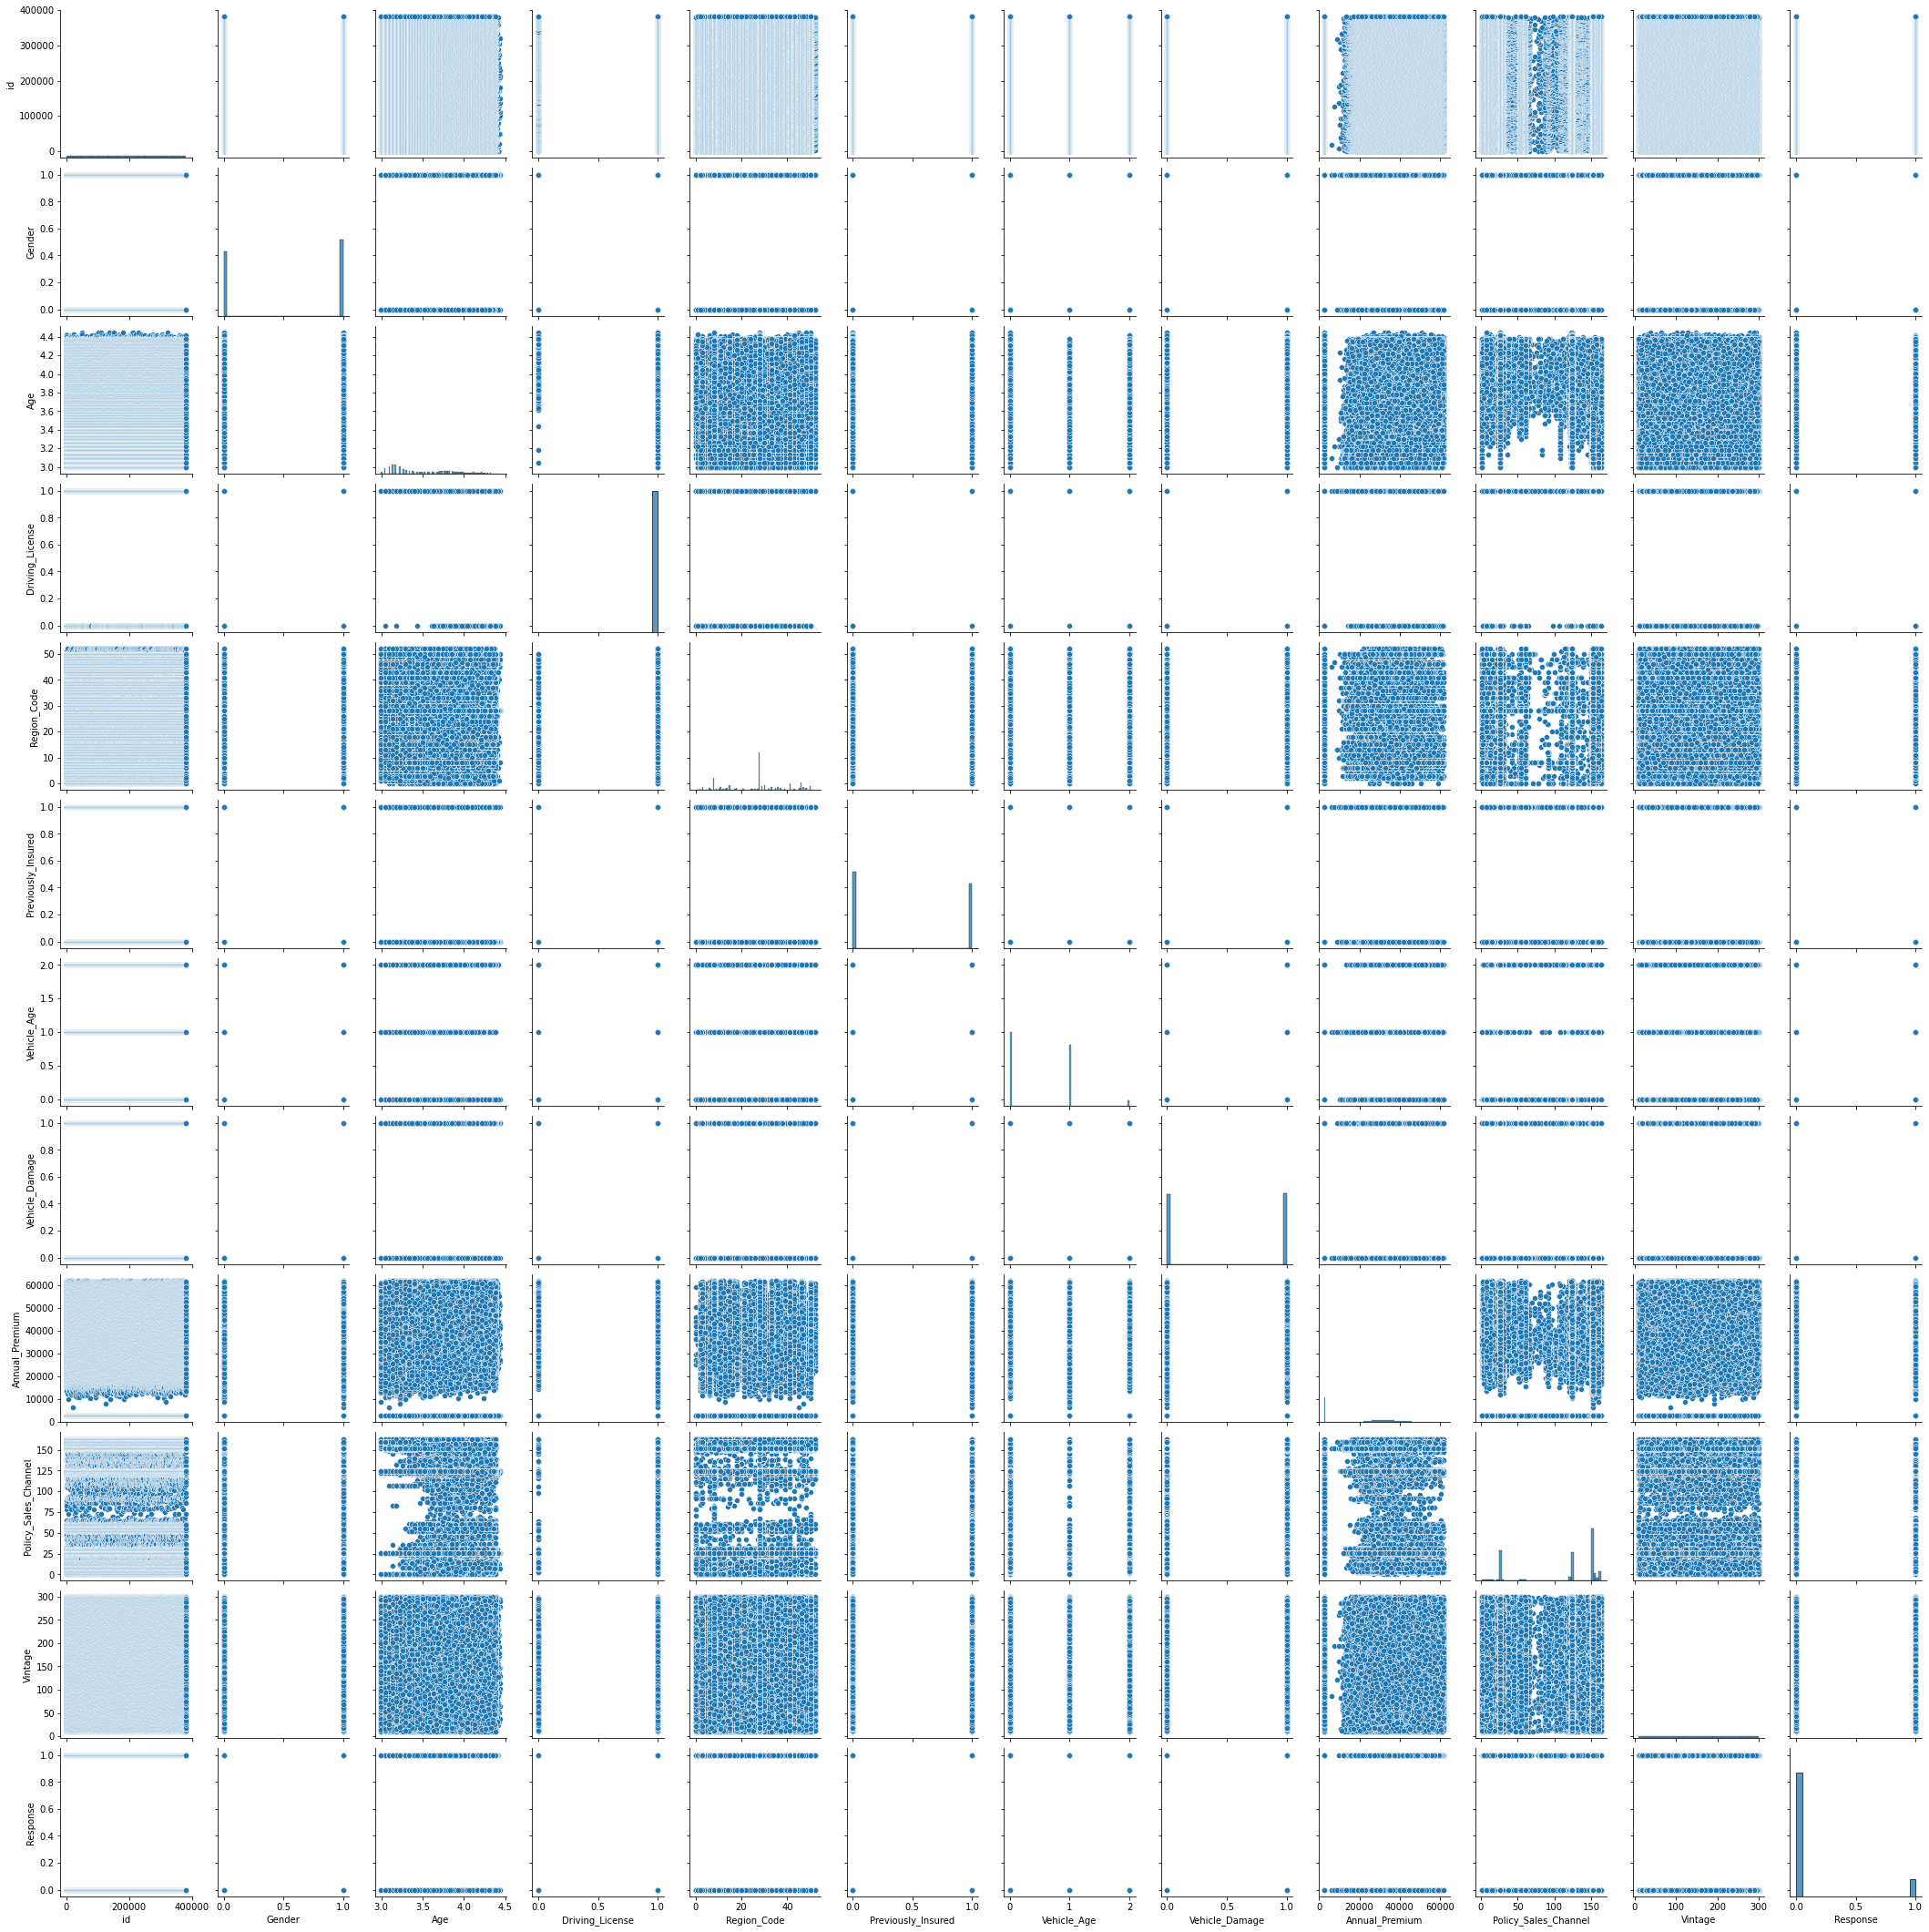

In [137]:
sns.pairplot(train_df)

In [138]:
X=train_df.drop(['Response','Previously_Insured'],axis=1)

In [139]:
y=train_df['Response']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# LogisticRegression

In [141]:
lr=LogisticRegression()


In [142]:
lr.fit(X_train,y_train)

LogisticRegression()

In [143]:
y_pred=lr.predict(X_train)


# Accuracy score of training data 

In [144]:
accuracy_score(y_train,y_pred)

0.8781853548685067

In [145]:
mean_squared_error(y_train,y_pred)

0.12181464513149334

In [146]:
y_pred=lr.predict(X_test)

# Accuracy score of testing data

In [147]:
accuracy_score(y_test,y_pred)

0.8783543245502845

In [148]:
mean_squared_error(y_test,y_pred)

0.12164567544971547

In [149]:
confusion_matrix(y_test,y_pred)

array([[65137,     0],
       [ 9021,     0]], dtype=int64)

# RandomForestClassifier

In [150]:
rfc=RandomForestClassifier()


In [151]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [152]:
y_pred=rfc.predict(X_train)


# Accuracy score of training data 

In [153]:
accuracy_score(y_train,y_pred)

0.9999831440409128

In [154]:
mean_squared_error(y_train,y_pred)

1.6855959087216103e-05

In [155]:
y_pred=rfc.predict(X_test)

# Accuracy score of testing data

In [156]:
accuracy_score(y_test,y_pred)

0.8732301302624127

In [157]:
mean_squared_error(y_test,y_pred)

0.1267698697375873

In [158]:
confusion_matrix(y_test,y_pred)

array([[64147,   990],
       [ 8411,   610]], dtype=int64)

# XGBClassifier

In [159]:
xgb_i=xgb.XGBClassifier()

In [160]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [161]:
y_pred=xgb_i.predict(X_train)


# Accuracy score of training data 

In [162]:
accuracy_score(y_train,y_pred)

0.8815127211923232

In [163]:
mean_squared_error(y_train,y_pred)

0.11848727880767687

In [164]:
y_pred=xgb_i.predict(X_test)

# Accuracy score of testing data

In [165]:
accuracy_score(y_test,y_pred)

0.8778553898433076

In [166]:
mean_squared_error(y_test,y_pred)

0.12214461015669247

In [167]:
confusion_matrix(y_test,y_pred)

array([[64925,   212],
       [ 8846,   175]], dtype=int64)

# DecisionTreeClassifier

In [168]:
dtc=DecisionTreeClassifier()


In [169]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [170]:
y_pred=dtc.predict(X_train)


# Accuracy score of training data 

In [171]:
accuracy_score(y_train,y_pred)

1.0

In [172]:
mean_squared_error(y_train,y_pred)

0.0

In [173]:
y_pred=dtc.predict(X_test)

# Accuracy score of testing data

In [174]:
accuracy_score(y_test,y_pred)

0.8202216888265595

In [175]:
mean_squared_error(y_test,y_pred)

0.17977831117344048

In [176]:
confusion_matrix(y_test,y_pred)

array([[58133,  7004],
       [ 6328,  2693]], dtype=int64)

# KNeighborsClassifier

In [177]:
knc=KNeighborsClassifier()


In [178]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [179]:
y_pred=knc.predict(X_train)


# Accuracy score of training data 

In [180]:
accuracy_score(y_train,y_pred)

0.8820015440058524

In [181]:
mean_squared_error(y_train,y_pred)

0.11799845599414761

In [182]:
y_pred=knc.predict(X_test)

# Accuracy score of testing data

In [183]:
accuracy_score(y_test,y_pred)

0.8673507915531703

In [184]:
mean_squared_error(y_test,y_pred)

0.13264920844682973

In [185]:
confusion_matrix(y_test,y_pred)

array([[64174,   963],
       [ 8874,   147]], dtype=int64)

# We will choose Logistic Regression Model because of no overfitting probelm
# Accuracy score of Logistic Regression Model for training and testing is almost similar.